# HW2 - Q1

In [1]:
import keras
from keras.datasets import reuters
import matplotlib.pyplot as plt
import matplotlib.ticker

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
C:\Users\anand\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\anand\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\anand\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\anand\AppData\Roa

In [2]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
np.load = np_load_old

In [3]:
len(train_data)

8982

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [5]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [6]:
train_labels[10]

3

## Preparing the Data

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [9]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Building the NN

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Validating our approach

Setting apart 2,000 samples in our training data to use as a validation set:

In [12]:
x_val = x_train[:2000]
partial_x_train = x_train[2000:]

y_val = one_hot_train_labels[:2000]
partial_y_train = one_hot_train_labels[2000:]

In [13]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='HW2_Q1.h5', monitor='val_loss', save_best_only=True)]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),callbacks=callbacks)

#model = keras.models.load_model("HW2_Q1.h5") # roll back to best model

Instructions for updating:
Use tf.cast instead.
Train on 6982 samples, validate on 2000 samples
Epoch 1/20
6982/6982 [==============================] - 3s 385us/step - loss: 2.6525 - acc: 0.4855 - val_loss: 1.8440 - val_acc: 0.6040
Epoch 2/20
6982/6982 [==============================] - 2s 293us/step - loss: 1.5059 - acc: 0.6775 - val_loss: 1.4561 - val_acc: 0.6830
Epoch 3/20
6982/6982 [==============================] - 2s 298us/step - loss: 1.1465 - acc: 0.7515 - val_loss: 1.2760 - val_acc: 0.7230
Epoch 4/20
6982/6982 [==============================] - 2s 275us/step - loss: 0.9154 - acc: 0.8049 - val_loss: 1.1640 - val_acc: 0.7465
Epoch 5/20
6982/6982 [==============================] - 2s 277us/step - loss: 0.7431 - acc: 0.8417 - val_loss: 1.1033 - val_acc: 0.7515
Epoch 6/20
6982/6982 [==============================] - 2s 283us/step - loss: 0.5954 - acc: 0.8748 - val_loss: 1.0498 - val_acc: 0.7655
Epoch 7/20
6982/6982 [==============================] - 2s 277us/step - loss: 0.4829 - a

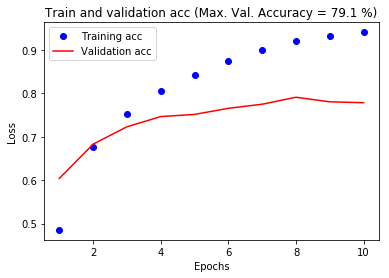

In [14]:
plt.clf()   # clear figure
ax=plt.gca()

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Train and validation acc (Max. Val. Accuracy = '+str(round(max(val_acc)*100,2))+' %)')
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(2))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [15]:
best_epoch=val_acc.index(max(val_acc))+1
print("Best epoch: ",best_epoch)
print("Best Accuracy: ",round(max(val_acc)*100,2))

Best epoch:  8
Best Accuracy:  79.1


Reporting validation accuracy here.